# Reference
 - __[Nextjournal Part 1&2](https://nextjournal.com/eric-brown/forecasting-with-prophet)__
 - __[Nextjournal Part 3](https://nextjournal.com/eric-brown/forecasting-with-prophet-part-3)__

# Setting Up

In [3]:
# Libraries
import pandas as pd
import numpy as np
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Register Matplotlib with Pandas
# pd.plotting.register_matplotlib_converters()

ds       y
0 2009-10-01  338630
1 2009-11-01  339386
2 2009-12-01  400264
3 2010-01-01  314640
4 2010-02-01  311022

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      72 non-null     datetime64[ns]
 1   y       72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


ds              y
count                   72      72.000000
mean   2012-09-15 08:20:00  401710.138889
min    2009-10-01 00:00:00  311022.000000
25%    2011-03-24 06:00:00  374655.750000
50%    2012-09-16 00:00:00  398296.500000
75%    2014-03-08 18:00:00  432892.500000
max    2015-09-01 00:00:00  501232.000000
std                    NaN   39999.439045

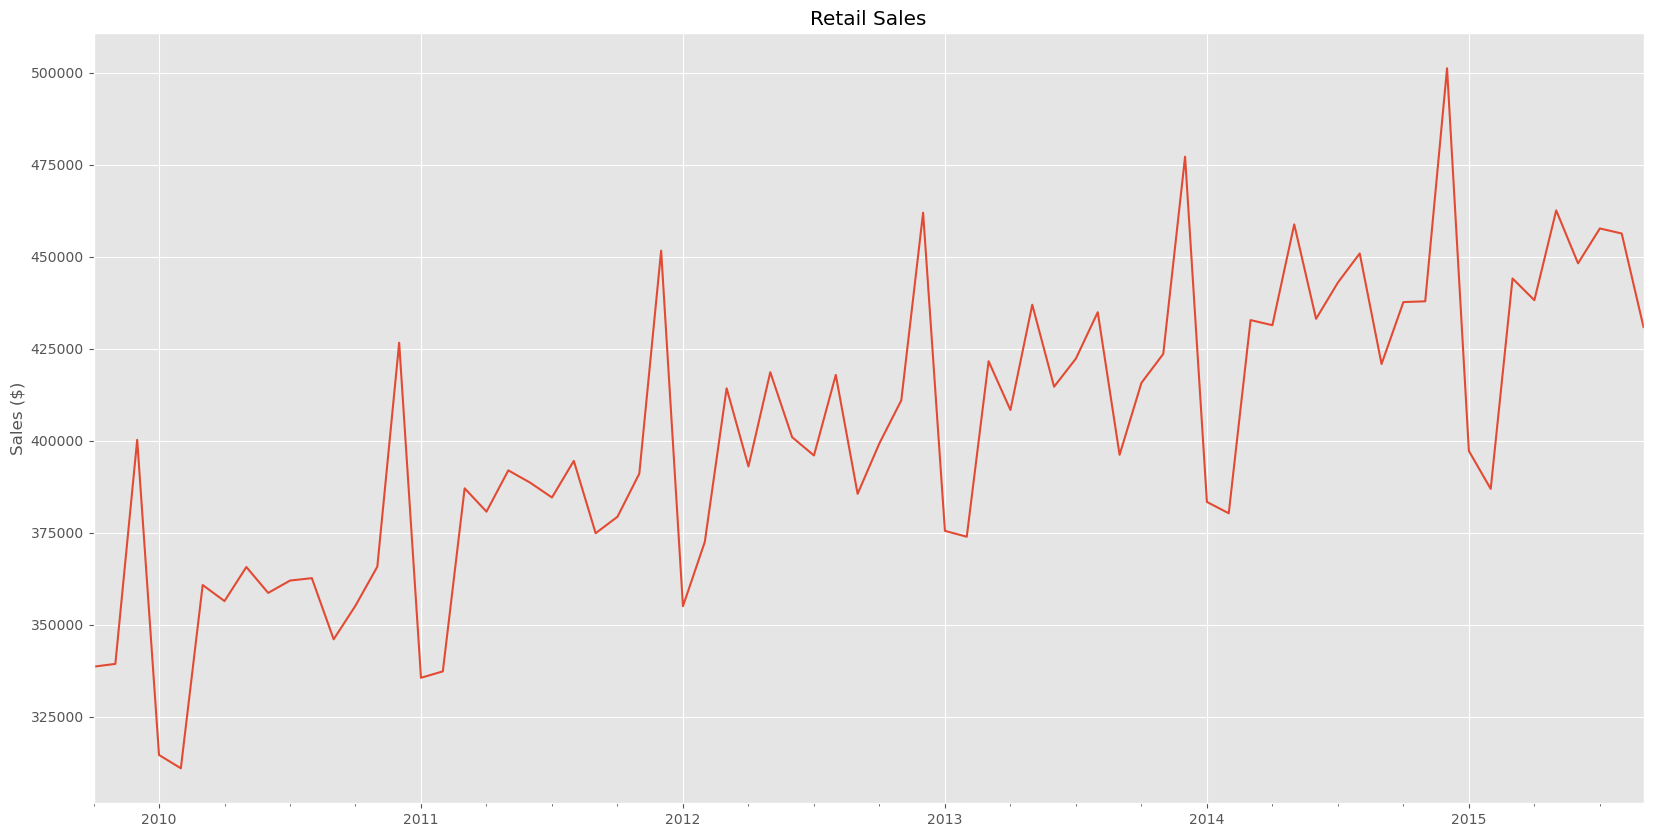

In [4]:
# Load dataset
sales_df = pd.read_csv('../Python/Input/retail_sales.csv', index_col='date', parse_dates=True)

# Prepare dataset for Prophet
df = sales_df.reset_index()
df = df.rename(columns={'date':'ds', 'sales':'y'})

# Show dataset
# display(sales_df.head())
# sales_df.info()
# sales_df.describe()

display(df.head())
df.info()
display(df.describe())

# Plot dataset
df.set_index('ds').plot(legend=False)
plt.ylabel('Sales ($)')
plt.xlabel('')
plt.title('Retail Sales')
plt.show()

# Prophet in Action

14:52:02 - cmdstanpy - INFO - Chain [1] start processing
14:52:03 - cmdstanpy - INFO - Chain [1] done processing


ds
count                   96
mean   2013-09-15 09:30:00
min    2009-10-01 00:00:00
25%    2011-09-23 12:00:00
50%    2013-09-16 00:00:00
75%    2015-09-08 06:00:00
max    2017-08-31 00:00:00

          ds           yhat     yhat_lower     yhat_upper
0 2009-10-01  335989.182253  330039.150288  341623.431841
1 2009-11-01  343393.087934  337687.129290  349041.565068
2 2009-12-01  400488.380581  394878.606997  406177.204393
3 2010-01-01  310178.357261  304843.719347  316050.268362
4 2010-02-01  308344.509476  303022.208341  314071.352059


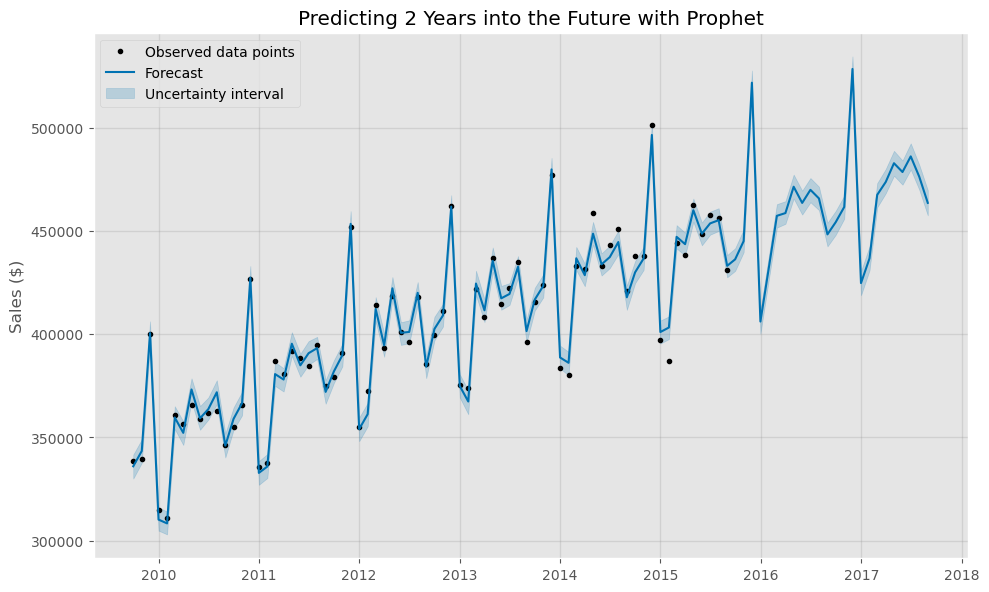

In [6]:
# define the model
model = Prophet()

# fit the model
model.fit(df);

# define the period for which we want a prediction (2 years into the future)
future = model.make_future_dataframe(periods=24, freq = 'ME')
display(future.describe())

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.title('Predicting 2 Years into the Future with Prophet')
plt.xlabel('')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

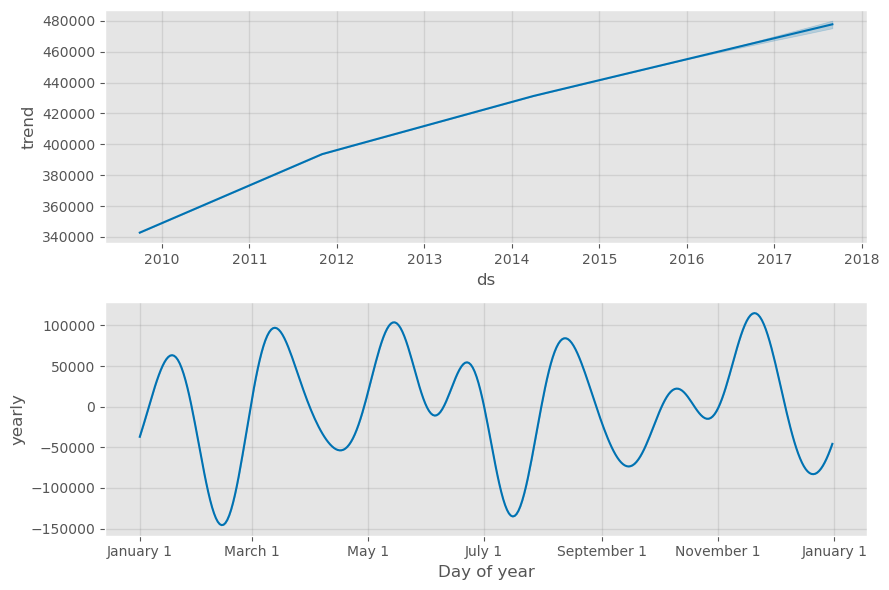

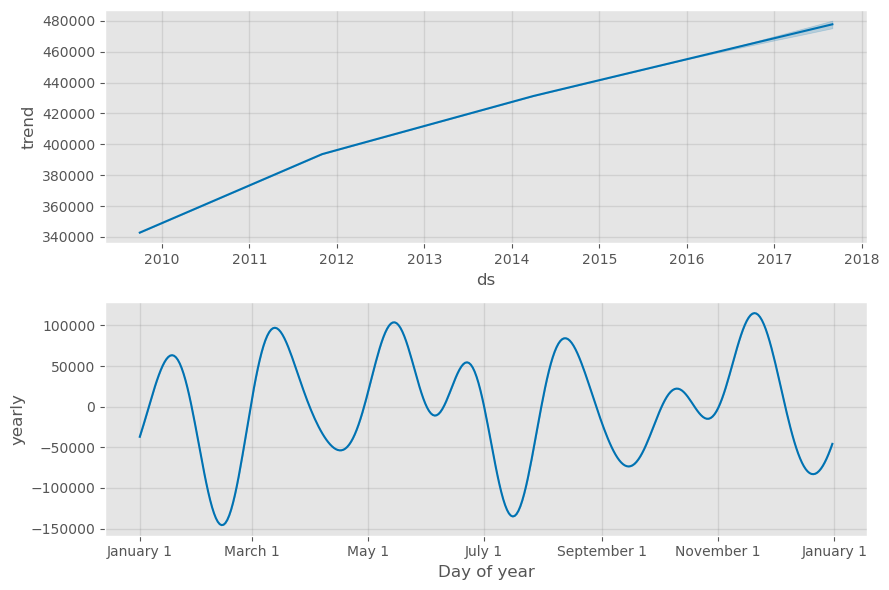

In [7]:
# Prophet's Forecast Components
model.plot_components(forecast)

# Compare Model vs Original Data

sales           yhat     yhat_lower     yhat_upper
2009-10-01  338630.0  335989.182253  330039.150288  341623.431841
2009-11-01  339386.0  343393.087934  337687.129290  349041.565068
2009-12-01  400264.0  400488.380581  394878.606997  406177.204393
2010-01-01  314640.0  310178.357261  304843.719347  316050.268362
2010-02-01  311022.0  308344.509476  303022.208341  314071.352059
...              ...            ...            ...            ...
2017-04-30       NaN  482729.129895  476686.330274  488722.080576
2017-05-31       NaN  478467.321125  472324.953315  484032.555964
2017-06-30       NaN  486039.295077  479661.265060  492338.925464
2017-07-31       NaN  476197.244330  469902.277490  481959.936109
2017-08-31       NaN  463527.581722  457455.520747  469683.123963

[96 rows x 4 columns]

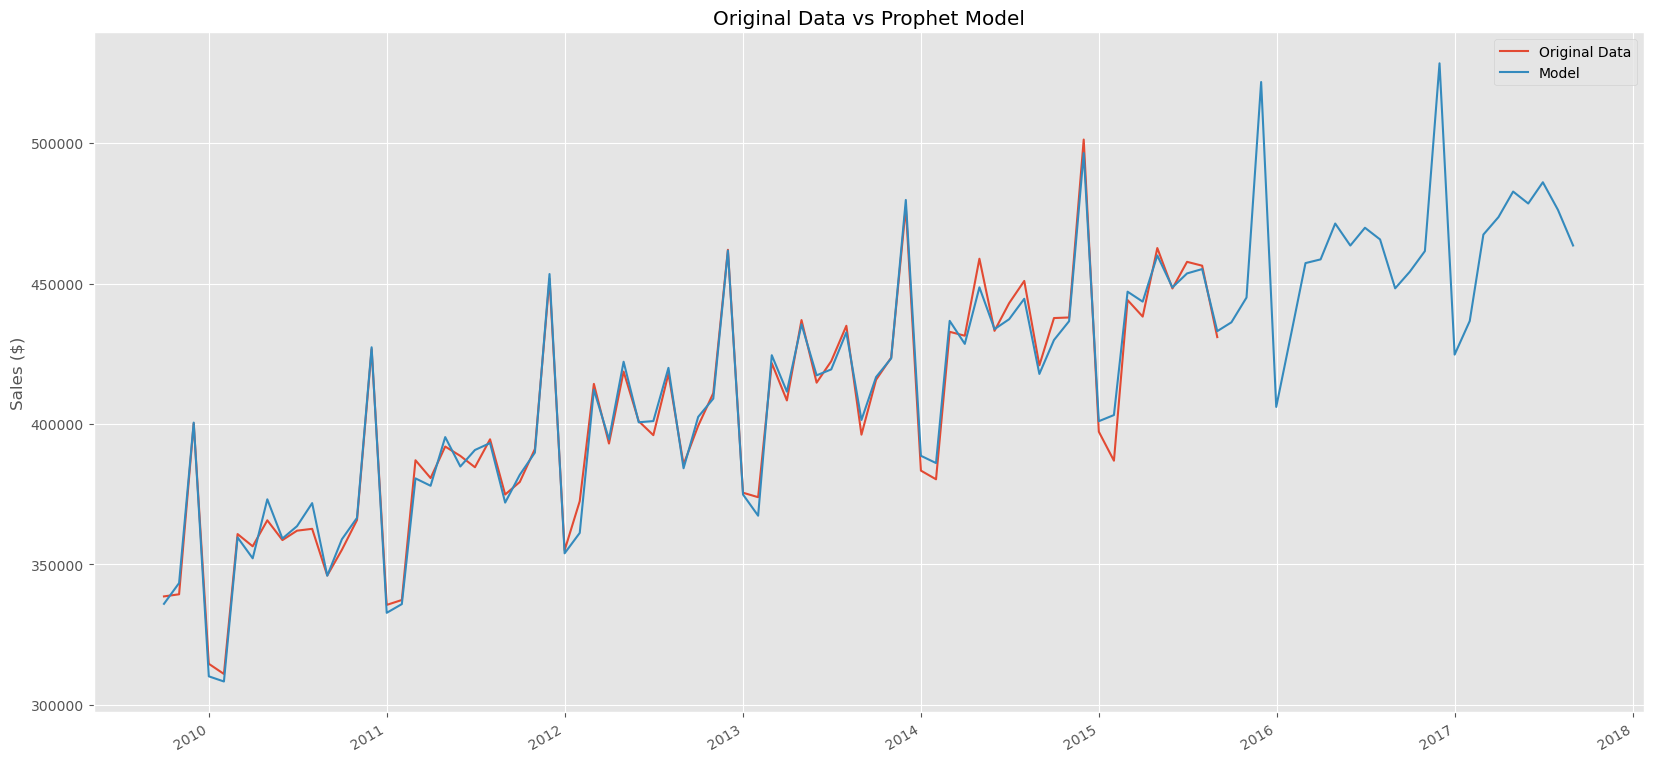

In [9]:
# Set our dataframes to have the same index of ds
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

# Combine the original data and our forecast model data
viz_df = sales_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

# Show dataset
display(viz_df)

# Plot dataset
viz_df[['sales', 'yhat']].plot()
plt.legend(['Original Data','Model'])
plt.ylabel('Sales ($)')
plt.title('Original Data vs Prophet Model')
plt.show()

# Another/Better Way of Visualizing the Data

In [11]:
# make sure our index as a datetime object
sales_df.index = pd.to_datetime(sales_df.index) 

# select the 2nd to last date
connect_date   = sales_df.index[-2] 

# Grab model data after the 2nd to last date
mask       = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

# Combine dfs
viz_df = sales_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

# Show dataset
display(viz_df)

sales           yhat     yhat_lower     yhat_upper
2009-10-01  338630.0            NaN            NaN            NaN
2009-11-01  339386.0            NaN            NaN            NaN
2009-12-01  400264.0            NaN            NaN            NaN
2010-01-01  314640.0            NaN            NaN            NaN
2010-02-01  311022.0            NaN            NaN            NaN
...              ...            ...            ...            ...
2017-04-30       NaN  482729.129895  476686.330274  488722.080576
2017-05-31       NaN  478467.321125  472324.953315  484032.555964
2017-06-30       NaN  486039.295077  479661.265060  492338.925464
2017-07-31       NaN  476197.244330  469902.277490  481959.936109
2017-08-31       NaN  463527.581722  457455.520747  469683.123963

[96 rows x 4 columns]

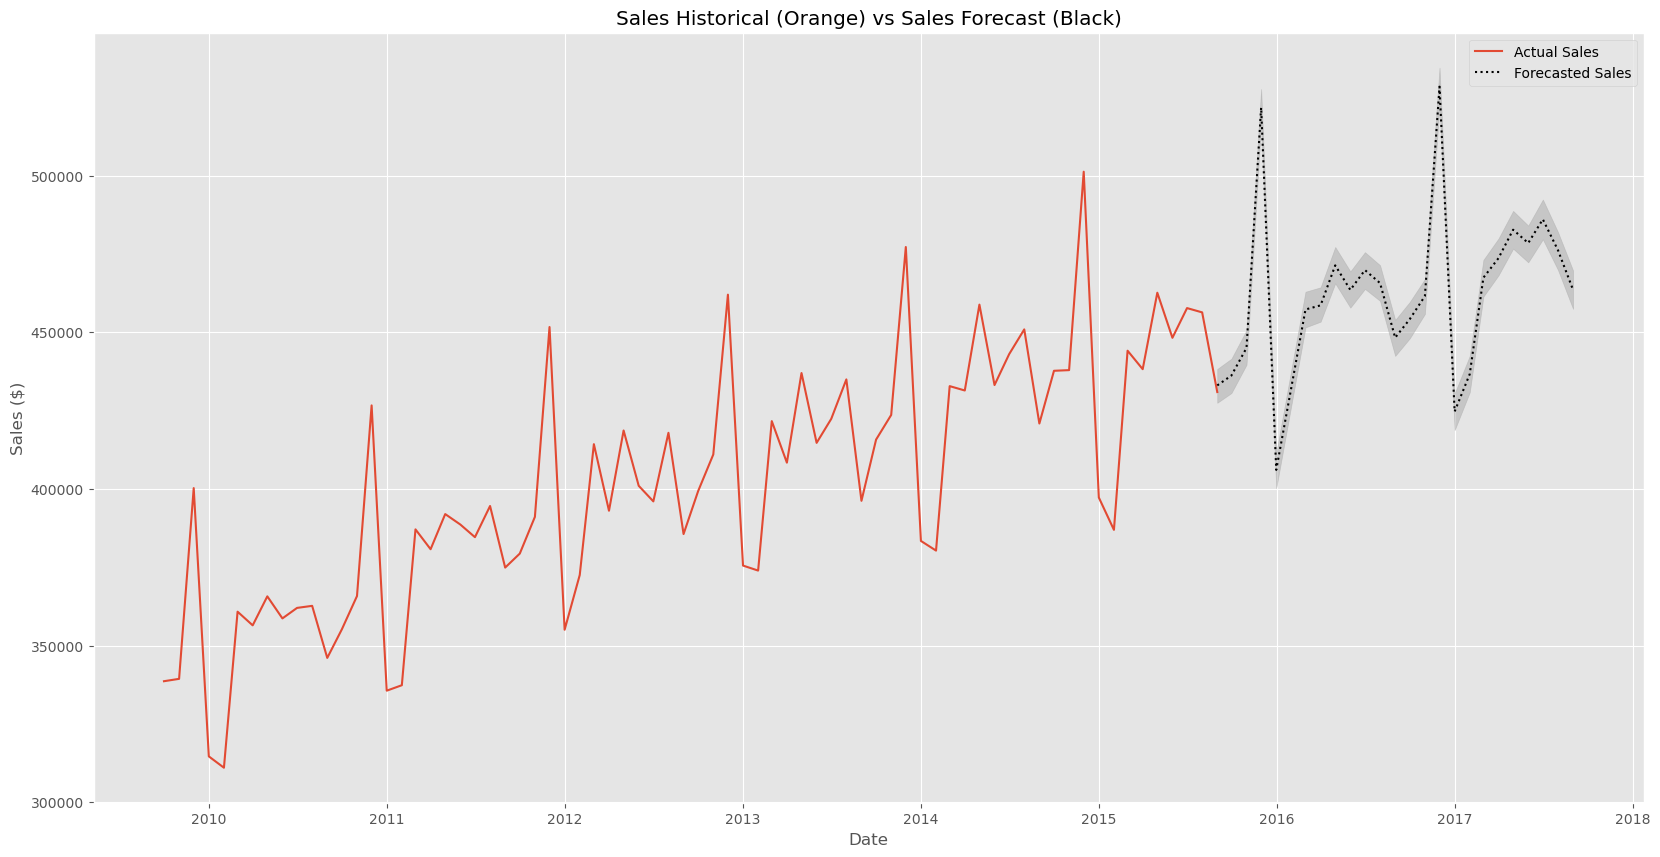

In [12]:
# Plot
fig, ax1 = plt.subplots()
ax1.plot(viz_df.sales)
ax1.plot(viz_df.yhat, color='black', linestyle=':')
ax1.fill_between(viz_df.index, viz_df['yhat_upper'], viz_df['yhat_lower'], alpha=0.5, color='darkgray')
ax1.set_title('Sales Historical (Orange) vs Sales Forecast (Black)')
ax1.set_ylabel('Sales ($)')
ax1.set_xlabel('Date')

plt.legend(['Actual Sales','Forecasted Sales'])
plt.show()

# Account for Holidays

14:52:04 - cmdstanpy - INFO - Chain [1] start processing
14:52:05 - cmdstanpy - INFO - Chain [1] done processing


ds
count                   96
mean   2013-09-15 09:30:00
min    2009-10-01 00:00:00
25%    2011-09-23 12:00:00
50%    2013-09-16 00:00:00
75%    2015-09-08 06:00:00
max    2017-08-31 00:00:00

          ds           yhat     yhat_lower     yhat_upper
0 2009-10-01  337673.348173  333659.531233  341556.616795
1 2009-11-01  337260.485289  333433.091760  341769.821044
2 2009-12-01  403857.823734  399764.782946  408106.987953
3 2010-01-01  310435.247426  306333.509347  314661.190947
4 2010-02-01  309463.840168  305494.232601  313830.191082


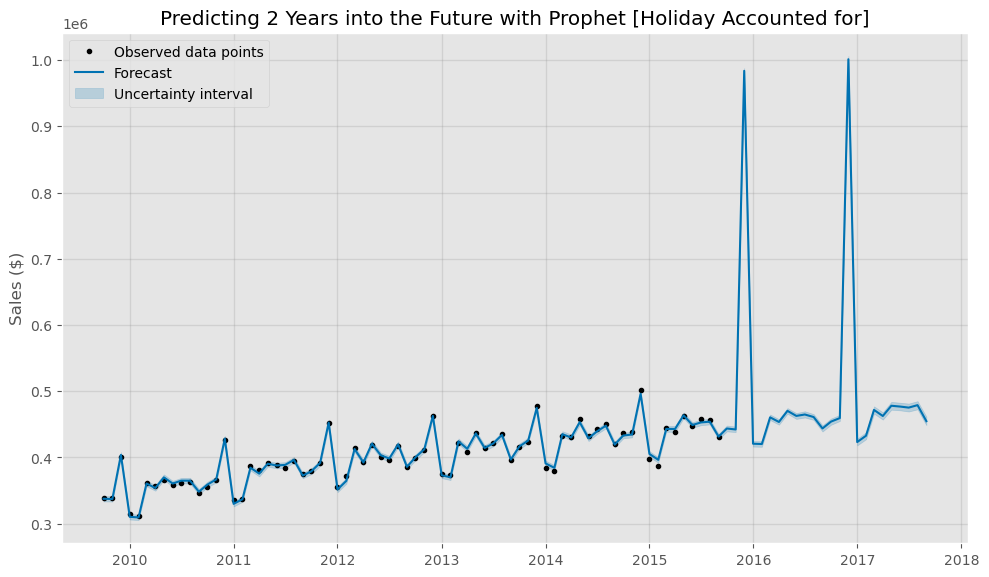

In [14]:
# Produce holiday constrict iwith the holiday and date of the holiday
# Based on our data observation, we assume company run sales promotion every december.
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

# Note
# lower_window and upper_window values are set to zero to indicate that we don't want Prophet to consider any other months than the ones listed

# Prepare dataset for Prophet
df.reset_index(inplace=True)

# Running Prophet
model = Prophet(holidays=promotions, weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

# define the period for which we want a prediction (2 years into the future)
future = model.make_future_dataframe(periods=24, freq = 'ME')
display(future.describe())

# use the model to make a forecast
forecast = model.predict(future)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.title('Predicting 2 Years into the Future with Prophet [Holiday Accounted for]')
plt.xlabel('')
plt.ylabel('Sales ($)')
plt.legend()
plt.show()

# Display
# display(promotions)

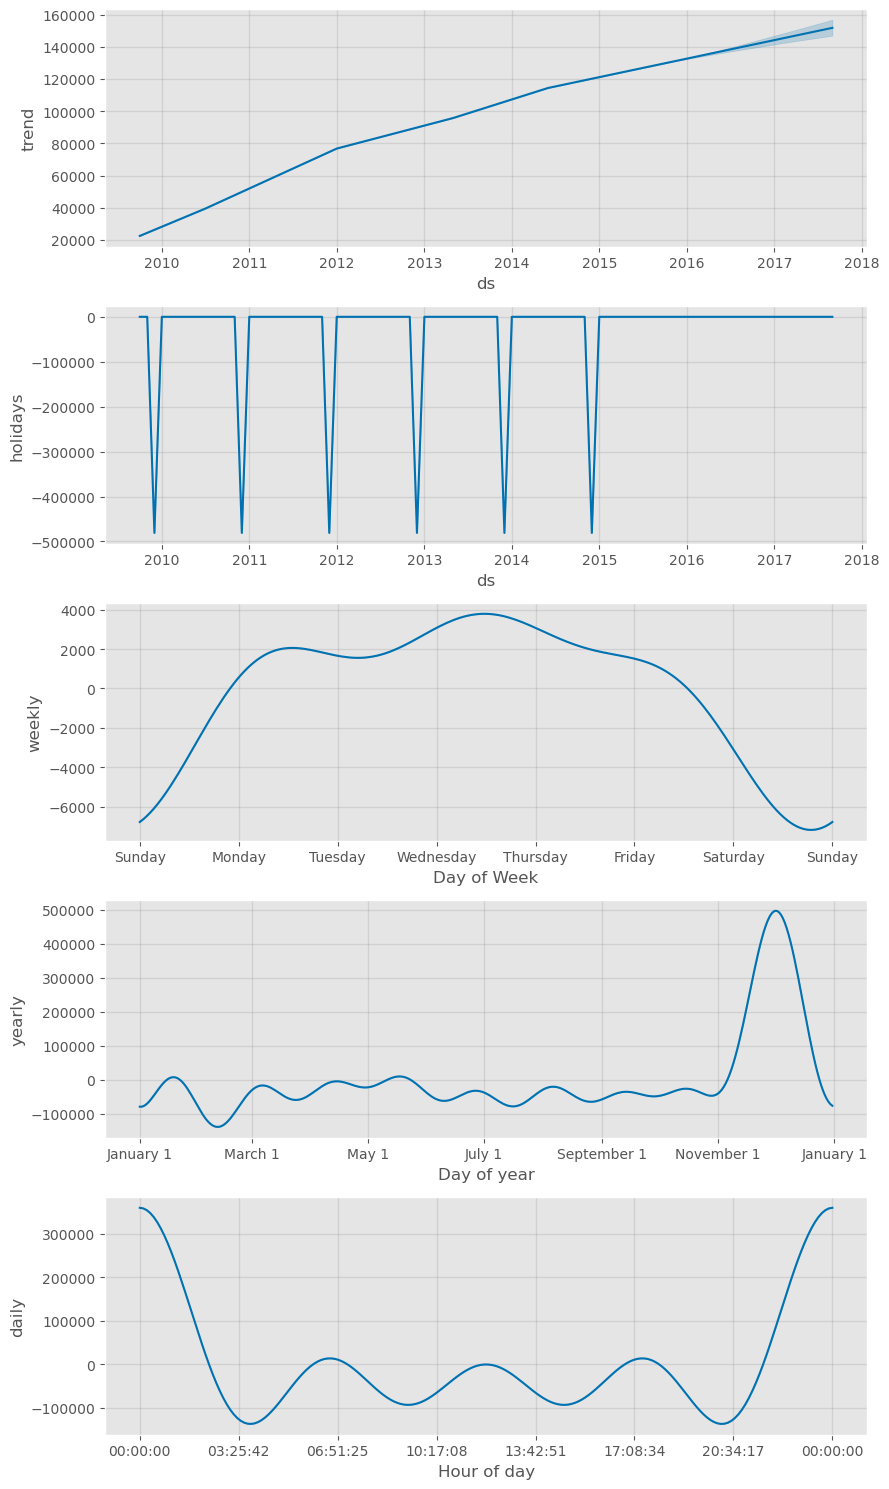

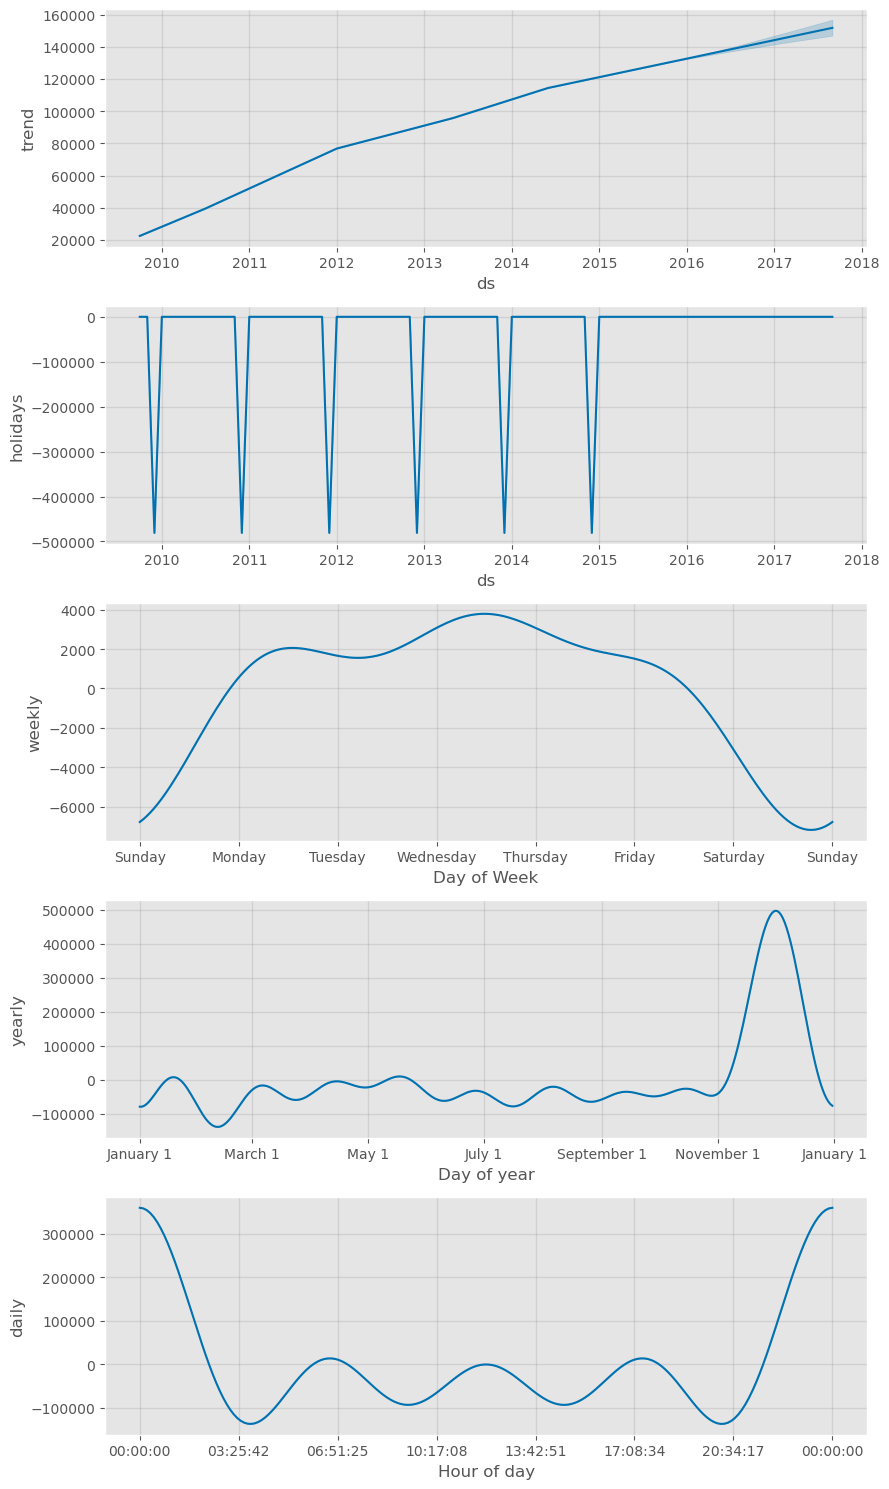

In [15]:
# Prophet's Forecast Components
model.plot_components(forecast)

# Compare Holidays vs No-Holidays Forecasts

In [17]:
from sklearn.metrics import mean_absolute_error

# Run Prophets
model_no_holiday = Prophet()
model_no_holiday.fit(df);

# Use the model to make a forecast
future_no_holiday   = model_no_holiday.make_future_dataframe(periods=24, freq = 'ME')
forecast_no_holiday = model_no_holiday.predict(future)

# # Combine datasets
# forecast.reset_index(inplace=True)
# # forecast.set_index('ds', inplace=True)
# forecast_no_holiday.set_index('ds', inplace=True)
compared_df = forecast.join(forecast_no_holiday, rsuffix="_no_holiday")
compared_df = compared_df[['ds','yhat', 'yhat_lower', 'yhat_upper', 'yhat_no_holiday', 'yhat_lower_no_holiday', 'yhat_upper_no_holiday']]

# Compare 
mae = mean_absolute_error(compared_df['yhat'], compared_df['yhat_no_holiday'])
print('MAE: %.3f' % mae)

# Display dataset
display(compared_df)

14:52:07 - cmdstanpy - INFO - Chain [1] start processing
14:52:08 - cmdstanpy - INFO - Chain [1] done processing


MAE: 12594.021


ds           yhat     yhat_lower     yhat_upper  yhat_no_holiday  \
0  2009-10-01  337673.348173  333659.531233  341556.616795    335989.182253   
1  2009-11-01  337260.485289  333433.091760  341769.821044    343393.087934   
2  2009-12-01  403857.823734  399764.782946  408106.987953    400488.380581   
3  2010-01-01  310435.247426  306333.509347  314661.190947    310178.357261   
4  2010-02-01  309463.840168  305494.232601  313830.191082    308344.509476   
..        ...            ...            ...            ...              ...   
91 2017-04-30  478128.954249  472134.547378  483964.898175    482729.129895   
92 2017-05-31  476886.613585  471188.014689  482673.039268    478467.321125   
93 2017-06-30  475308.947145  469398.478857  481407.317423    486039.295077   
94 2017-07-31  479054.318594  472722.601383  485055.804756    476197.244330   
95 2017-08-31  454845.526193  448795.551358  461704.875520    463527.581722   

    yhat_lower_no_holiday  yhat_upper_no_holiday  
0           330313.167857          341575.820485  
1           337826.484298          349223.142696  
2           394619.914222          405459.007771  
3           304127.194854          315823.334647  
4           302892.656486          314240.014253  
..                    ...                    ...  
91          476927.415896          488753.561284  
92          472787.083773          484754.332906  
93          479941.262118          492315.702976  
94          470145.542476          481902.074649  
95          457768.839436          469925.339111  

[96 rows x 7 columns]

In [18]:
# Prep dataset
sales_df.reset_index(inplace=True)
sales_df = sales_df.rename(columns={'date':'ds', 'sales':'y'})
# compared_df.set_index('ds', inplace=True)
# compared_df.reset_index(inplace=True)

# Combine combine_df with original sale
mask        = (compared_df.ds > connect_date)
compared_df = compared_df.loc[mask]

# Combine dfs
# combined_df = sales_df.join(compared_df, on='ds', how = 'outer')
combined_df = pd.concat([sales_df,compared_df])

# compared_df
display(combined_df)

ds         y           yhat     yhat_lower     yhat_upper  \
0  2009-10-01  338630.0            NaN            NaN            NaN   
1  2009-11-01  339386.0            NaN            NaN            NaN   
2  2009-12-01  400264.0            NaN            NaN            NaN   
3  2010-01-01  314640.0            NaN            NaN            NaN   
4  2010-02-01  311022.0            NaN            NaN            NaN   
..        ...       ...            ...            ...            ...   
91 2017-04-30       NaN  478128.954249  472134.547378  483964.898175   
92 2017-05-31       NaN  476886.613585  471188.014689  482673.039268   
93 2017-06-30       NaN  475308.947145  469398.478857  481407.317423   
94 2017-07-31       NaN  479054.318594  472722.601383  485055.804756   
95 2017-08-31       NaN  454845.526193  448795.551358  461704.875520   

    yhat_no_holiday  yhat_lower_no_holiday  yhat_upper_no_holiday  
0               NaN                    NaN                    NaN  
1               NaN                    NaN                    NaN  
2               NaN                    NaN                    NaN  
3               NaN                    NaN                    NaN  
4               NaN                    NaN                    NaN  
..              ...                    ...                    ...  
91    482729.129895          476927.415896          488753.561284  
92    478467.321125          472787.083773          484754.332906  
93    486039.295077          479941.262118          492315.702976  
94    476197.244330          470145.542476          481902.074649  
95    463527.581722          457768.839436          469925.339111  

[97 rows x 8 columns]

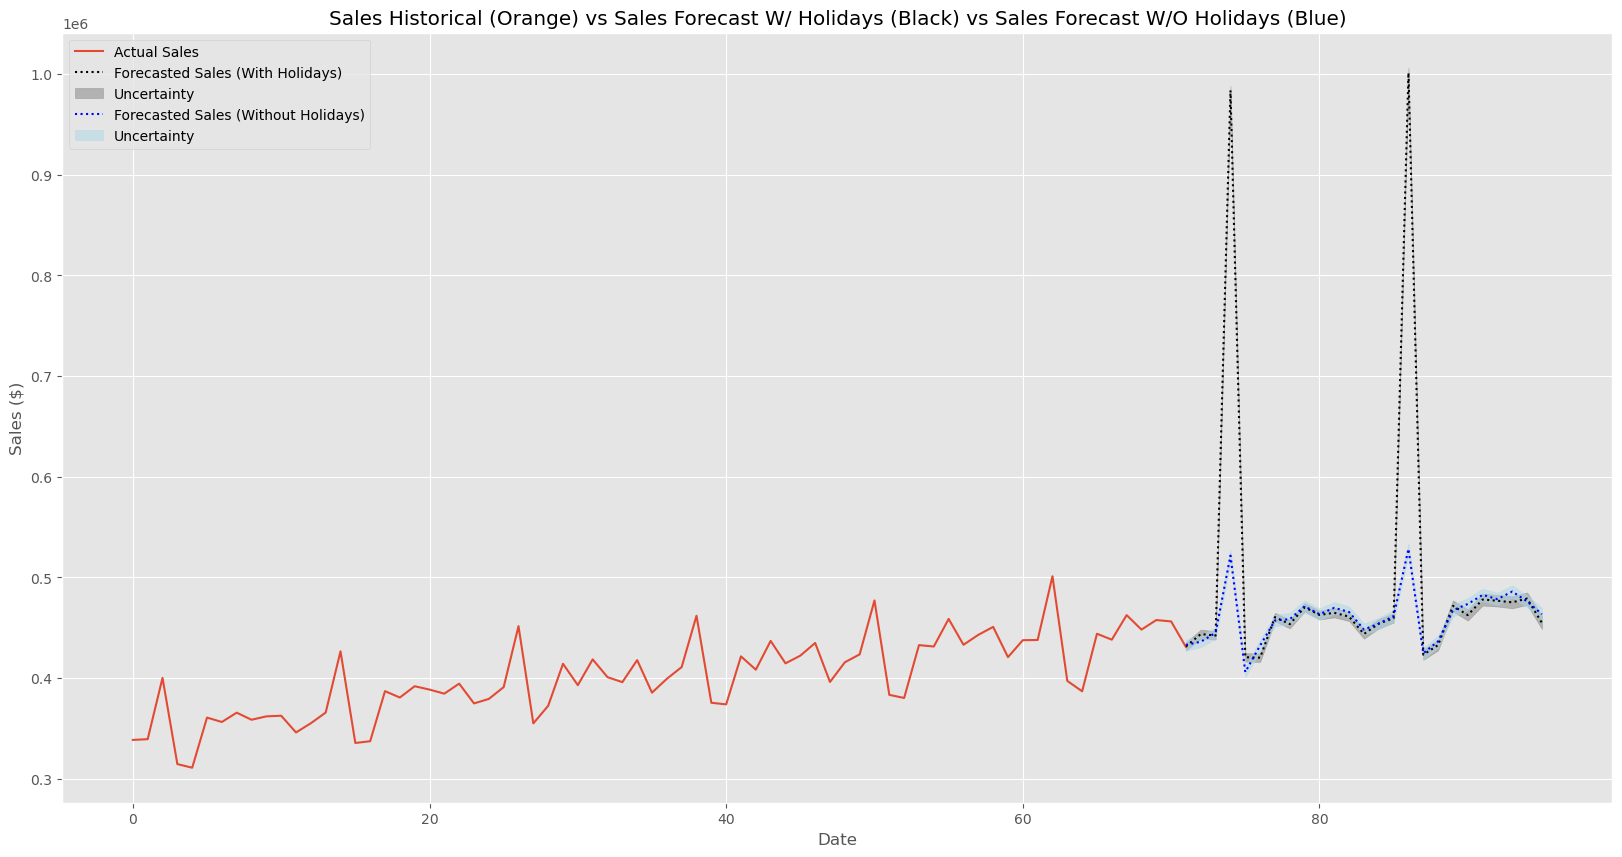

In [19]:
# Plot
fig, ax1 = plt.subplots()

# Original Sales
ax1.plot(combined_df.y)

# Without Holidays
ax1.plot(combined_df.yhat, color='black', linestyle=':')
ax1.fill_between(combined_df.index, combined_df['yhat_upper'], combined_df['yhat_lower'], alpha=0.5, color='gray')

# With Holidays
ax1.plot(combined_df.yhat_no_holiday, color='blue', linestyle=':')
ax1.fill_between(combined_df.index, combined_df['yhat_upper_no_holiday'], combined_df['yhat_lower_no_holiday'], alpha=0.5, color='lightblue')

ax1.set_title('Sales Historical (Orange) vs Sales Forecast W/ Holidays (Black) vs Sales Forecast W/O Holidays (Blue)')
ax1.set_ylabel('Sales ($)')
ax1.set_xlabel('Date')

plt.legend(['Actual Sales', 'Forecasted Sales (With Holidays)', 'Uncertainty', 'Forecasted Sales (Without Holidays)', 'Uncertainty'])
plt.show()

## Conclusion
> Clearly accounting for holidays here hurts my forecasting.